## 6. Numerical Elements -- Phase Diagrams (35pts)

One of the most useful tools we can learn from classical mechanics is the phase diagram. For us, it is the plot of the position and velocity of a particle in a 1D system, but the concept can be extended to higher dimensions and to other systems. The phase diagram can tell us about the stability of fixed points, the period of oscillations, and the qualitative behavior of the system. 

In this exercise, we will consider a particle in a potential $U(x)$ and we will plot the phase diagrams using both `quiver` and `streamplot` in `matplotlib`. The purpose of this exercise is to learn how to plot phase diagrams and to interpret the results.

We start with a little code for plotting the phase diagram of the simple harmonic oscillator. The code is written in a way that you can easily modify it to plot the phase diagram of other systems. The key point is to make sure that the `quiver` or `streamplot` function is called with the correct arguments. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
def SHO(X,V):
    
    # For a simple harmonic oscillator, x' = v, and v' = -x.
    dX = V
    dV = -X
    
    return dX, dV

def generate_phase_space(x_lim, v_lim, grid_size):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    
    dX, dV = SHO(X, V)
    
    return X, V, dX, dV

# Generate phase space
x_lim = (-5, 5)
v_lim = (-5, 5)
grid_size = 20
X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size)

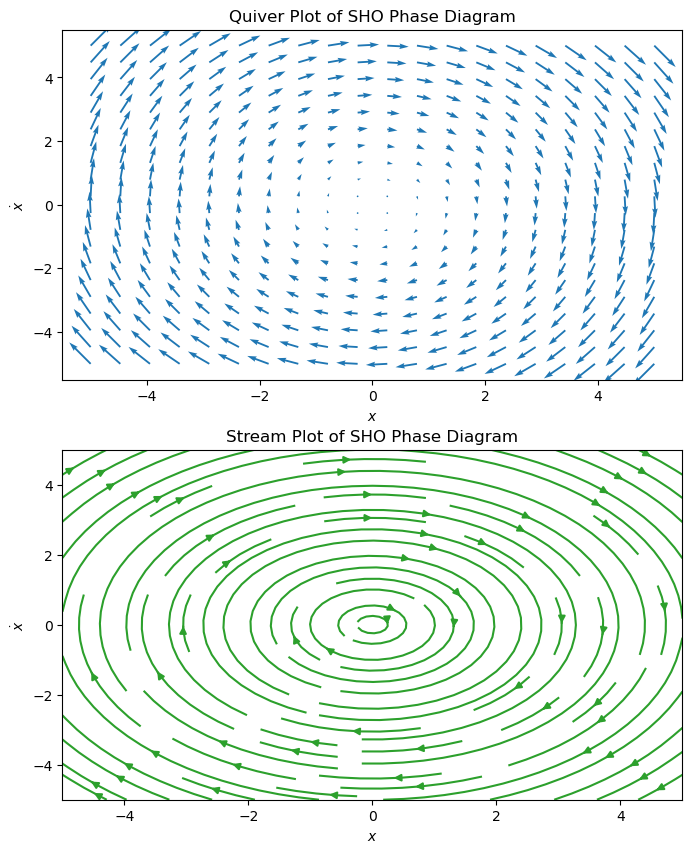

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(8, 10))  # Two rows, one column
    
# Quiver plot on the first subplot
axs[0].quiver(X, V, dX, dV, color='C0')
axs[0].set_title('Quiver Plot of SHO Phase Diagram')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$\dot{x}$')

# Stream plot on the second subplot
axs[1].streamplot(X, V, dX, dV, color='C2')
axs[1].set_title('Stream Plot of SHO Phase Diagram')
axs[1].set_xlabel(r'$x$')
axs[1].set_ylabel(r'$\dot{x}$');

a. (4pts) Explain how the code works to produce the phase diagram. The key part is explaining what the function `SHO` does and how that relates to the `quiver` and `streamplot` calls. What does `np.meshgrid` do and why is it used?

In [9]:
from IPython.display import HTML, display

def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)
    
    display(HTML('<img src onerror="{}" style="display:none">'.format(script)))

<div style="background-color:PaleGreen;color:black;padding:2%;">

**SHO describes the rate of change of velocity and position as a function of velocity and position. SHO can be replaced with other functions that describe physical systems.**

**np.meshgrid creates the inputs for SHO from the boundaries set by the user by turning two 1D lists into a grid Quiver and streamplot both represent the outputs of SHO for the points in space selected by np.meshgrid. For each 'quiver' or arrow in the quiver plot it takes in four values: x and y position where the arrow starts, and dx and dy for the direction of the arrows. As such, it displays the rate of change for position and velocity that SHO describes. Streamplots is similar, just connecting arrows that point at/near each other**


b. (8pts) Modify the code to produce the phase diagram for the physical pendulum. You can choose mass and length. Make sure to explore the diagram outside of the small angle approximation. What new features do you observe in the phase diagram? What motion are they associated with?

The potential energy of a physical pendulum is

$$U(\theta)=mgl(1-\cos\theta)$$

This potential gives rise to a force:

$$F(\theta) = -\dfrac{dU}{d\theta} = -mgl\sin\theta.$$

The equation of motion is then,

$$mgl\ddot{\theta} = -mgl\sin\theta.$$

Or more simply,

$$\ddot{\theta} = -\dfrac{g}{l}\sin\theta.$$

We split this into two first order equations,

$$\dot{\theta} = \omega,$$
$$\dot{\omega} = -\dfrac{g}{l}\sin\theta.$$

and then we can plot the phase diagram.

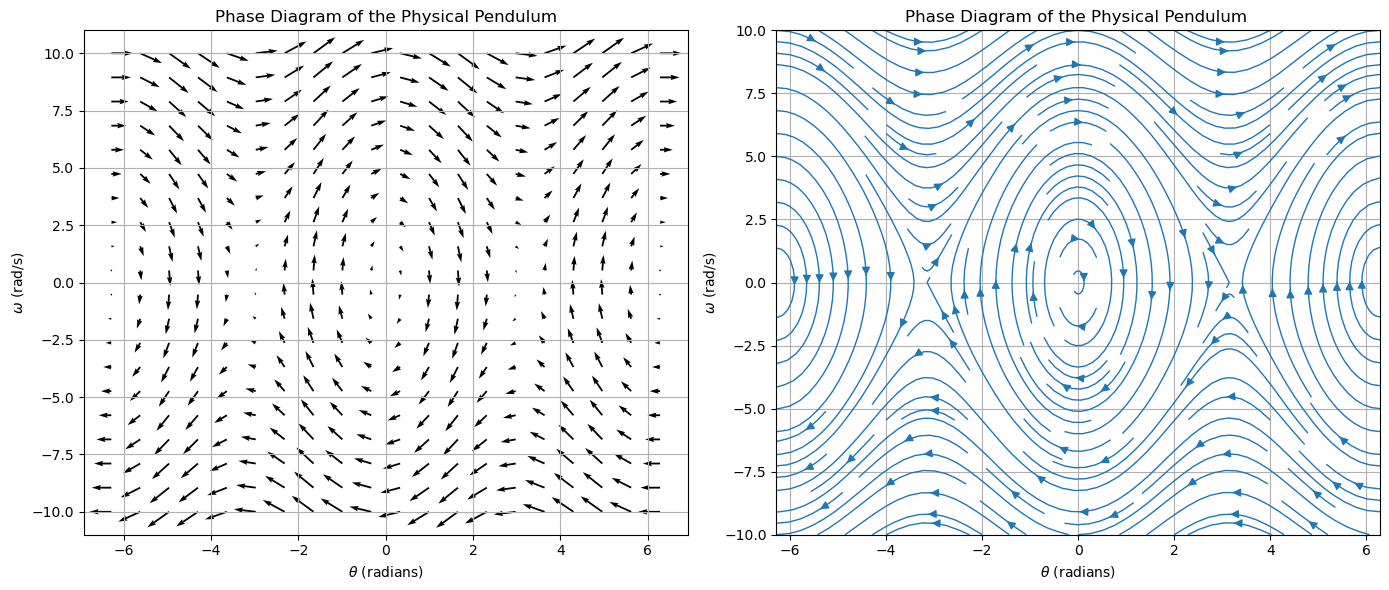

In [14]:
m = 2  # kg
l = 0.7  # m
g = 9.81  # m/s^2

def physical_pendulum(theta, omega):
    dtheta = omega
    domega = - (g / l) * np.sin(theta)
    return dtheta, domega

def generate_phase_space(theta_lim, omega_lim, grid_size):
    theta = np.linspace(theta_lim[0], theta_lim[1], grid_size)
    omega = np.linspace(omega_lim[0], omega_lim[1], grid_size)
    
    Theta, Omega = np.meshgrid(theta, omega)
    dTheta, dOmega = physical_pendulum(Theta, Omega)
    
    return Theta, Omega, dTheta, dOmega

theta_lim = (-2 * np.pi, 2 * np.pi) 
omega_lim = (-10, 10)  
grid_size = 20

Theta, Omega, dTheta, dOmega = generate_phase_space(theta_lim, omega_lim, grid_size)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.quiver(Theta, Omega, dTheta, dOmega, angles='xy', scale_units='xy', scale=20)
ax1.set_xlabel(r'$\theta$ (radians)')
ax1.set_ylabel(r'$\omega$ (rad/s)')
ax1.set_title('Phase Diagram of the Physical Pendulum')
ax1.grid()

ax2.streamplot(Theta, Omega, dTheta, dOmega, density=1.5, linewidth=1, arrowsize=1.2)
ax2.set_xlabel(r'$\theta$ (radians)')
ax2.set_ylabel(r'$\omega$ (rad/s)')
ax2.set_title('Phase Diagram of the Physical Pendulum ')
ax2.grid()

plt.tight_layout()
plt.show()


<div style="background-color:PaleGreen;color:black;padding:2%;">


**As we discussed before, we've sort of got three different kinds of motion going on. In the middle there is standard back and forth swinging, which observes conservation of energy. Above there is counterclockwise motion and below there is clockwise motion. The pattern repeats for each $2\pi n$**

c. (8pts) Modify the code to produce the phase diagram for the damped harmonic oscillator. You can choose $k/m$ and $b/m$, but might want to explore the values. What features do you observe in the phase diagram? What motion are they associated with?

Now we have a code that we can use to plot the phase diagram of any 1D system. We will use it to explore the damped harmonic oscillator and the damped physical pendulum. Here we write the equations of motion as the system is still 1-D, but the forces are not derived from a potential.

The damped harmonic oscillator has the equation of motion:
$$\ddot{x}=-\frac{k}{m}x-\frac{b}{m}\dot{x}$$

The damped harmonic oscillator can be written like:

$$\ddot{x}+2\beta\dot{x}+\omega_0^2x=0,$$

where $\beta = b/2m$ and $\omega_0^2 = k/m$. We know that the solution depends on how $\beta$ and $\omega_0$ compare.  So we will show solutions for $\beta/\omega_0 = 0.1$ (light damping), $\beta/\omega_0 = 1$ (critical damping), and $\beta/\omega_0 = 10$ (heavy damping).

In terms of first order equations, we have:

$$\dot{x} = v,$$
$$\dot{v} = -2\beta v - \omega_0^2x.$$

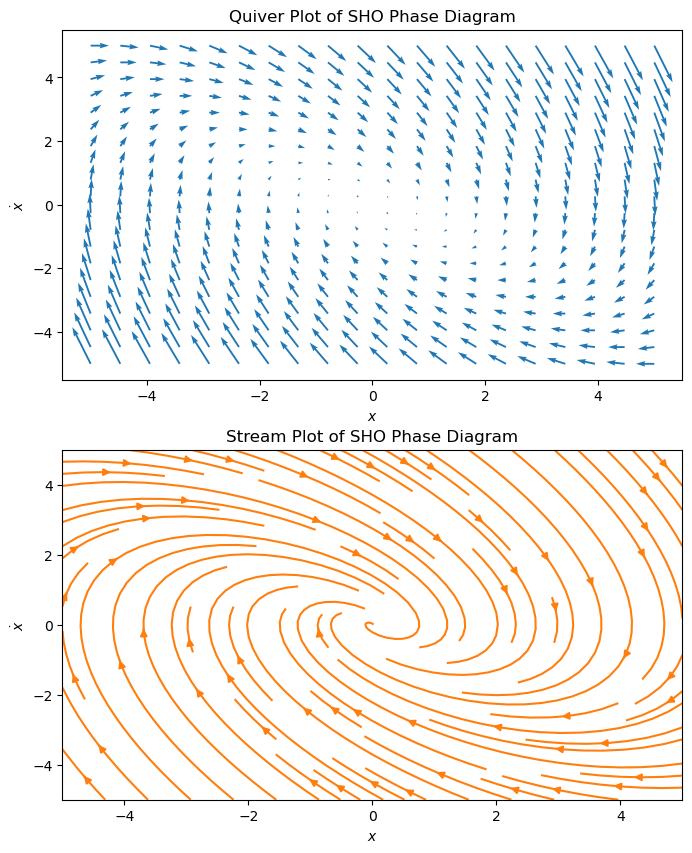

In [15]:
#Part_C_8pts

km = 1
bm = 1

def SHO(X,V, km=km, bm=bm):
    
    # For a simple harmonic oscillator, x' = v, and v' = -x.
    dX = V
    dV = -km*X - bm * V
    
    return dX, dV

def generate_phase_space(x_lim, v_lim, grid_size):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    
    dX, dV = SHO(X, V)
    
    return X, V, dX, dV

# Generate phase space
x_lim = (-5, 5)
v_lim = (-5, 5)
grid_size = 20
X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size)

fig, axs = plt.subplots(2, 1, figsize=(8, 10))  # Two rows, one column
    
# Quiver plot on the first subplot
axs[0].quiver(X, V, dX, dV, color='C0')
axs[0].set_title('Quiver Plot of SHO Phase Diagram')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$\dot{x}$')

# Stream plot on the second subplot
axs[1].streamplot(X, V, dX, dV, color='C1')
axs[1].set_title('Stream Plot of SHO Phase Diagram')
axs[1].set_xlabel(r'$x$')
axs[1].set_ylabel(r'$\dot{x}$');

<div style="background-color:PaleGreen;color:black;padding:2%;">

**The inward vortex shape comes from the damping that pulls energy out of the system. The skewedness (oval-shape) can be adjusted by the k/m and b/m factors**

d. (8pts) Modify the code again to produce the phase diagram for the damped physical pendulum. You can choose $b/ml$, but might want to explore the values. How does this motion compare to the motion of the damped harmonic oscillator? 

The damped physical pendulum has the equation of motion:
$$\ddot{\theta}=-\frac{g}{l}\sin\theta-\frac{b}{ml}\dot{\theta}$$

To make life easier, we will choose $\omega_0^2 = g/l$ and $\beta = \dfrac{b}{ml}$. This gives us the equation of motion,

$$\ddot{\theta} = -\omega_0^2\sin\theta - \beta\dot{\theta}.$$

And we write that as two first order equations,

$$\dot{\theta} = \omega,$$
$$\dot{\omega} = -\omega_0^2\sin\theta - \beta\omega.$$

Clearly there's some importance to the ratio of damping to the natural frequency. So we will choose a few combinations. We observe the motion is damped but we also see over the top motion that is not present in the damped harmonic oscillator.

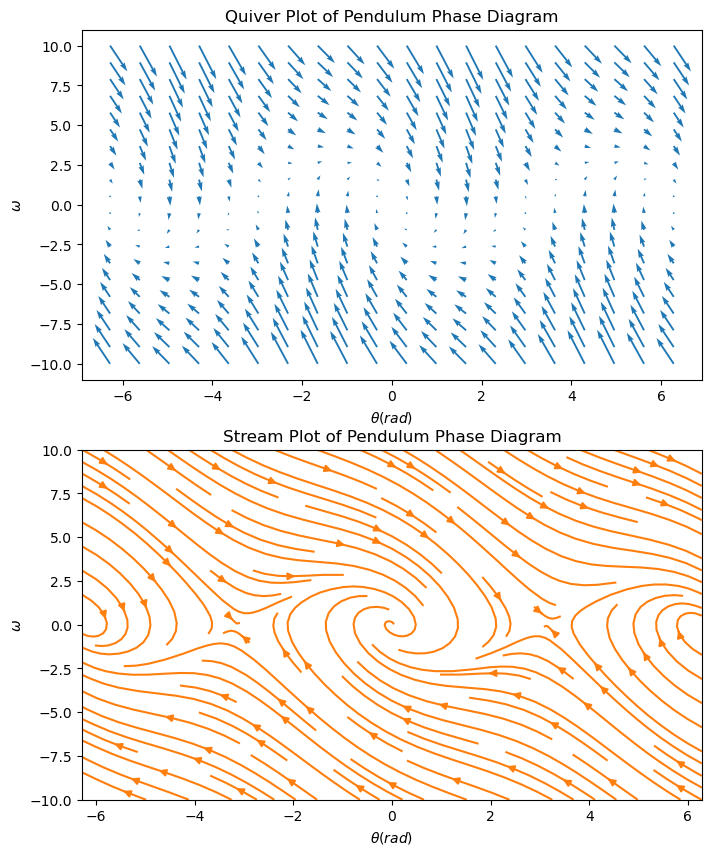

In [16]:
#Part_D_8pts

l = 2
g = 9.8
bm = 3

def pendulum(theta, omega, g=g, l=l, bm = bm):
    dtheta = omega
    domega = -(g / l) * np.sin(theta) - bm / l * omega
    return dtheta, domega

def generate_phase_space(x_lim, v_lim, grid_size):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    
    dX, dV = pendulum(X, V, )
    
    return X, V, dX, dV

# Generate phase space
theta_lim = (-np.pi * 2, np.pi * 2)
omega_lim = (-10, 10)
grid_size = 20
X, V, dX, dV = generate_phase_space(theta_lim, omega_lim, grid_size)

fig, axs = plt.subplots(2, 1, figsize=(8, 10))  # Two rows, one column
    
# Quiver plot on the first subplot
axs[0].quiver(X, V, dX, dV, color='C0')
axs[0].set_title('Quiver Plot of Pendulum Phase Diagram')
axs[0].set_xlabel(r'$\theta (rad)$')
axs[0].set_ylabel(r'$\omega$')

# Stream plot on the second subplot
axs[1].streamplot(X, V, dX, dV, color='C1')
axs[1].set_title('Stream Plot of Pendulum Phase Diagram')
axs[1].set_xlabel(r'$\theta (rad)$')
axs[1].set_ylabel(r'$\omega$');

<div style="background-color:PaleGreen;color:black;padding:2%;">

**With a small enough b/m it isn't obvious that higher trajectories crash into one of the vortex centers, but with higher values it is clear that all $\omega$ values eventually crash in like the damped harmonic oscillator. These are very simmilar apart from the $2\pi n$ repetition**

e. (7pts) Return to the simple harmonic oscillator. Show using conservation of energy the phase diagram is a series of ellipses in $(x,v)$ space. Plot these ellipses on top of a phase diagram for the simple harmonic oscillator to illustrate how the phase diagram explains the total energy of the system.

<div style="background-color:Yellow;color:black;padding:2%;">

**Conservation of energy: $E = KE + U = \frac{1}{2}mv^2+\frac{1}{2}kx^2$**

**Ellipse: $$\frac{x^2}{E\frac{2}{m}}+\frac{v^2}{E\frac{2}{k}} = 1 \implies a =\sqrt{\frac{2E}{m}},\ b =\sqrt{\frac{2E}{k}}  $$**

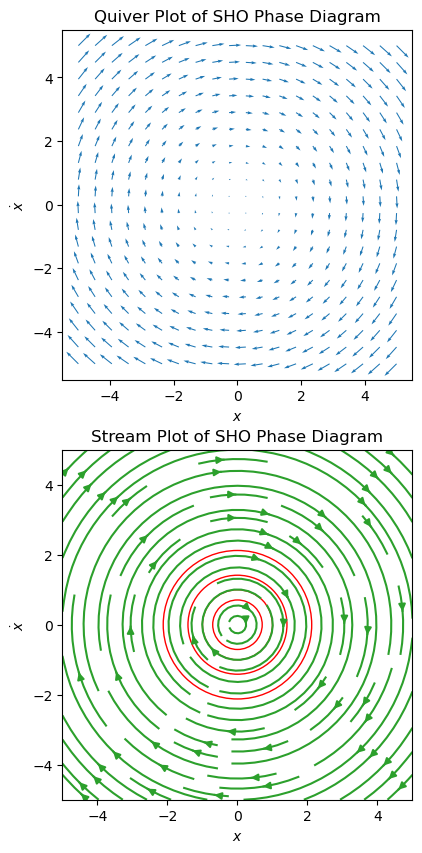

In [18]:
#Part_E_7pts
def SHO(X,V):
    
    # For a simple harmonic oscillator, x' = v, and v' = -x.
    dX = V
    dV = -X
    
    return dX, dV

def generate_phase_space(x_lim, v_lim, grid_size):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    
    dX, dV = SHO(X, V)
    
    return X, V, dX, dV

# Generate phase space
x_lim = (-5, 5)
v_lim = (-5, 5)
grid_size = 20
X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size)


E = np.array([1,2,4,9])
m, k = 1, 1 #corresponds with SHO equation defined above
wh = (np.sqrt(2*E / m), np.sqrt(2*E/k))

from matplotlib.patches import Ellipse
cons_ellipse = [Ellipse((0,0), wh[0][i], wh[1][i], edgecolor='r', facecolor='none') for i in range(4)]

fig, axs = plt.subplots(2, 1, figsize=(8, 10))  # Two rows, one column

# Quiver plot on the first subplot
axs[0].quiver(X, V, dX, dV, color='C0')
axs[0].set_title('Quiver Plot of SHO Phase Diagram')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$\dot{x}$')
axs[0].set_aspect('equal', adjustable='box')

# Stream plot on the second subplot
axs[1].streamplot(X, V, dX, dV, color='C2')
axs[1].set_title('Stream Plot of SHO Phase Diagram')
axs[1].set_xlabel(r'$x$')
axs[1].set_ylabel(r'$\dot{x}$')
axs[1].set_aspect('equal', adjustable='box')
for i in range(4):
    axs[1].add_patch(cons_ellipse[i])


plt.show()